In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [3]:
# data.fillna(method='bfill',inplace=True)
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [4]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1525 non-null   int64  
 1   gender             1525 non-null   object 
 2   age                1525 non-null   float64
 3   hypertension       1525 non-null   int64  
 4   heart_disease      1525 non-null   int64  
 5   ever_married       1525 non-null   object 
 6   work_type          1525 non-null   object 
 7   Residence_type     1525 non-null   object 
 8   avg_glucose_level  1525 non-null   float64
 9   bmi                1525 non-null   float64
 10  smoking_status     1525 non-null   object 
 11  stroke             1525 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 143.1+ KB


C:\Users\praveen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

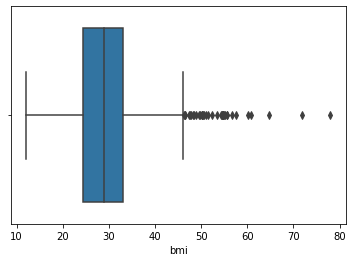

In [6]:
import seaborn as sns
sns.boxplot(data['bmi'])

In [7]:
data['stroke'].unique()

array([1, 0], dtype=int64)

In [8]:
print(np.where(data['bmi']>10))

(array([   0,    1,    2, ..., 1522, 1523, 1524], dtype=int64),)


In [9]:
Q1=np.percentile(data['bmi'],25,interpolation='midpoint')
Q3=np.percentile(data['bmi'],75,interpolation='midpoint')
IQR=Q3-Q1

In [10]:
print("IQR is :",IQR)

IQR is : 8.700000000000003


In [24]:
upper=np.where(data['bmi']>=(Q3+1.5*IQR))
print("upper bound",upper)
print(np.where(upper))
lower=np.where(data['bmi']<=(Q1-1.5*IQR))
print("lower bound",lower)
print(np.where(lower))

upper bound (array([  21,   66,  113,  254,  258,  270,  333,  341,  358,  368,  415,
        417,  430,  462,  466,  493,  539,  544,  595,  622,  637,  662,
        672,  715,  761,  805,  860,  928, 1003, 1061, 1077, 1239, 1257,
       1266, 1267, 1304, 1322, 1501], dtype=int64),)
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64))
lower bound (array([], dtype=int64),)
(array([], dtype=int64), array([], dtype=int64))


In [25]:
print('old shape',data.shape)
data.drop(upper[0],inplace = True)
data.drop(lower[0], inplace = True)
 
print('New shape',data.shape)

old shape (1525, 12)
New shape (1487, 12)


C:\Users\praveen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

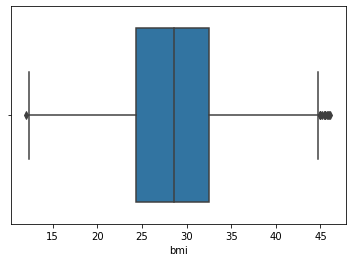

In [27]:
sns.boxplot(data['bmi'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1524
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1487 non-null   int64  
 1   gender             1487 non-null   object 
 2   age                1487 non-null   float64
 3   hypertension       1487 non-null   int64  
 4   heart_disease      1487 non-null   int64  
 5   ever_married       1487 non-null   object 
 6   work_type          1487 non-null   object 
 7   Residence_type     1487 non-null   object 
 8   avg_glucose_level  1487 non-null   float64
 9   bmi                1487 non-null   float64
 10  smoking_status     1487 non-null   object 
 11  stroke             1487 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 183.3+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
data['gender']=le1.fit_transform(data['gender'])

In [32]:
le2=LabelEncoder()
data['ever_married']=le2.fit_transform(data['ever_married'])

In [33]:
le3=LabelEncoder()
data['work_type']=le3.fit_transform(data['work_type'])

In [34]:
le4=LabelEncoder()
data['Residence_type']=le4.fit_transform(data['Residence_type'])

In [46]:
le5=LabelEncoder()
data['age']=le5.fit_transform(data['age'])

In [53]:
le6=LabelEncoder()
data['smoking_status']=le6.fit_transform(data['smoking_status'])

In [63]:
x=data.iloc[:,1:11]
x.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,82,0,1,1,2,1,228.69,36.600000,1
1,0,76,0,0,1,3,0,202.21,29.391563,2


In [64]:
y=data.iloc[:,11]
y.head(2)

0    1
1    1
Name: stroke, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=True)

In [66]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
trainx=sd.fit_transform(trainx)
testx=sd.fit_transform(testx)

In [67]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(trainx,trainy)
pred=model.predict(testx)

In [68]:
print("Prediction is ",pred)

Prediction is  [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0]


In [69]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,testy)
print("Accuracy : ",acc)

Accuracy :  0.8422818791946308


In [70]:
from sklearn.neighbors import KNeighborsClassifier as knn
model_knn=knn(n_neighbors=5,metric='minkowski',p=2)
model_knn.fit(trainx,trainy)
predknn=model_knn.predict(testx)

In [71]:
print("prediction : ",predknn)

prediction :  [0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [72]:
accknn=accuracy_score(predknn,testy)
print("Accuracy :",accknn)

Accuracy : 0.8187919463087249


In [73]:
from sklearn.tree import DecisionTreeClassifier as DTC
modeldt=DTC(max_depth=4,criterion='entropy')
modeldt.fit(trainx,trainy)
preddt=modeldt.predict(testx)

In [74]:
print("prediction :",preddt)

prediction : [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [75]:
accdt=accuracy_score(preddt,testy)
print("accuracy :",accdt)

accuracy : 0.8087248322147651


In [76]:
from sklearn.ensemble import RandomForestClassifier as RFC
modelrfc=RFC(n_estimators=20,max_depth=5,criterion='gini',max_features=5)
modelrfc.fit(trainx,trainy)
predrfc=modelrfc.predict(testx)

In [77]:
print("prediction is",predrfc)

prediction is [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0]


In [78]:
accrfc=accuracy_score(predrfc,testy)
print("accuracy :",accrfc)

accuracy : 0.8355704697986577


In [79]:
from xgboost import XGBClassifier as xgb
modelxgb=xgb()
modelxgb.fit(trainx,trainy)
predxgb=modelxgb.predict(testx)

In [80]:
print("prediction :",predxgb)

prediction : [1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0]


In [81]:
accxgb=accuracy_score(predxgb,testy)
print("accuracy :",accxgb)

accuracy : 0.7986577181208053


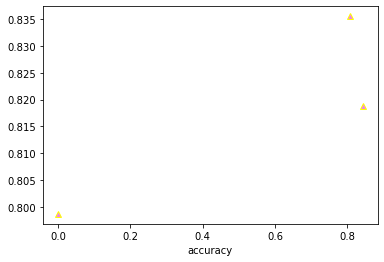

In [87]:
import matplotlib.pyplot as plt
accuracy=pd.DataFrame({'LR':[0.8422818791946308],'KNN':[0.8187919463087249],'DT':[0.8087248322147651],'RFC':[0.8355704697986577],'XGB':[0.7986577181208053]})
LR=accuracy['LR'].tolist()
KNN=accuracy['KNN'].tolist()
DT=accuracy['DT'].tolist()
RFC=accuracy['RFC'].tolist()
XGB=accuracy['XGB'].tolist()
plt.plot(LR,KNN,DT,RFC,XGB,color='yellow',marker='^',markerfacecolor='violet',linestyle='--',linewidth=3)
plt.xlabel("accuracy")
# plt.ylabel()
plt.show()